In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
car_price_data = pd.read_csv("CarPrice_Assignment.csv")

In [5]:
car_price_data.head()

,car_ID,price,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling
0,1,13495.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,3
1,2,16500.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,3
2,3,16500.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,1
3,4,13950.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,2
4,5,17450.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,2


In [6]:
car_price_data = car_price_data.select_dtypes(include=[np.number])
car_price_data = car_price_data.drop(columns=["car_ID"])

In [7]:
car_price_data.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling
0,13495.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,3
1,16500.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,3
2,16500.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1
3,13950.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,2
4,17450.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,2


In [8]:
X = car_price_data[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',	'compressionratio',	'horsepower',	'peakrpm',	'citympg',	'highwaympg',	'symboling']].values
y = car_price_data['price'].values.reshape(-1, 1)

#Normalization : Z-score normalization
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [9]:
print(X.shape)
print(y.shape)

(164, 14)
(164, 1)


In [10]:
X = np.column_stack((X, np.ones(X.shape[0])))
print(X.shape[1])
print(X[:10])

15
[[-1.54070935 -0.31489459 -0.74188052 -1.85421844  0.02919802  0.0810577
   0.56925146 -1.65143768 -0.24981027  0.19200416 -0.28640508 -0.62852937
  -0.54741266  1.87365466  1.        ]
 [-1.54070935 -0.31489459 -0.74188052 -1.85421844  0.02919802  0.0810577
   0.56925146 -1.65143768 -0.24981027  0.19200416 -0.28640508 -0.62852937
  -0.54741266  1.87365466  1.        ]
 [-0.59200732 -0.12873882 -0.12739362 -0.44002057  0.52686642  0.57011488
  -2.34470427  0.69153501 -0.24981027  1.22876783 -0.28640508 -0.92012433
  -0.68725016  0.07142965  1.        ]
 [ 0.26021653  0.29011166  0.17984982  0.30636163 -0.35264937 -0.3857696
  -0.46354297  0.48392983  0.02455943 -0.02499288  0.79586296 -0.19113694
  -0.12790015  0.97254215  1.        ]
 [ 0.19589775  0.29011166  0.26763366  0.30636163  0.52867612  0.21443693
  -0.46354297  0.48392983 -0.52417997  0.28844729  0.79586296 -1.06592181
  -1.24660016  0.97254215  1.        ]
 [ 0.26021653  0.34440709  0.22374174 -0.16503766 -0.04499982  0.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
np.random.seed(4)
theta = np.random.randn(X_train.shape[1], 1)
theta.shape
theta

array([[ 0.05056171],
       [ 0.49995133],
       [-0.99590893],
       [ 0.69359851],
       [-0.41830152],
       [-1.58457724],
       [-0.64770677],
       [ 0.59857517],
       [ 0.33225003],
       [-1.14747663],
       [ 0.61866969],
       [-0.08798693],
       [ 0.4250724 ],
       [ 0.33225315],
       [-1.15681626]])

In [13]:
def model(X, theta):
  return X.dot(theta)

In [14]:
def cost(X, y, theta):
    m = len(X)
    return (1 / (2 * m)) * np.sum(np.square(model(X, theta) - y))

In [15]:
def gradient(X, y, theta):
  m = len(X)
  return (1 / m) * X.T.dot(model(X, theta) - y)

In [16]:
print(cost(X, y, theta))

126696566.97108172


In [17]:
print(gradient(X, y, theta))

[[ -4989.42754903]
 [ -6009.52669675]
 [ -6620.37074788]
 [  -969.43882836]
 [ -7257.33084937]
 [ -7708.44979591]
 [ -5070.86068597]
 [  -991.59644186]
 [  -905.2014627 ]
 [ -7183.02016928]
 [  1056.08032394]
 [  6009.72941586]
 [  6125.97613366]
 [   143.69129563]
 [-13359.42917602]]


In [18]:
def gradient_descent(X, y, theta, learning_rate = 0.01, n_iterations = 1000):
  #creation tab stockage pour enregestrer evolution du cout de modele
    cost_history = np.zeros(n_iterations)

    for i in range(n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta)#mise a jour param theta
        cost_history[i] = cost(X, y, theta)

    return theta, cost_history

Final parameters =  [[  498.96468432]
 [  157.46618428]
 [ 1019.23410705]
 [  215.20252179]
 [  866.43816395]
 [ 3817.61055619]
 [ -107.71295839]
 [ -819.17410931]
 [ 1048.74274153]
 [ 2182.8152257 ]
 [ 1085.93668598]
 [ -249.87101814]
 [ -529.45561079]
 [  509.32696299]
 [13159.92256116]]


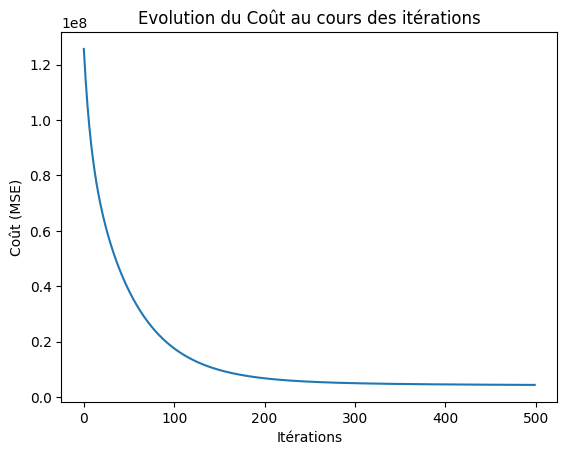

In [21]:
n_iterations = 500
learning_rate = 0.01
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

print("Final parameters = ", theta_final)
plt.plot(range(n_iterations), cost_history)
plt.title('Evolution du Coût au cours des itérations')
plt.xlabel('Itérations')
plt.ylabel('Coût (MSE)')
plt.show()

33 33


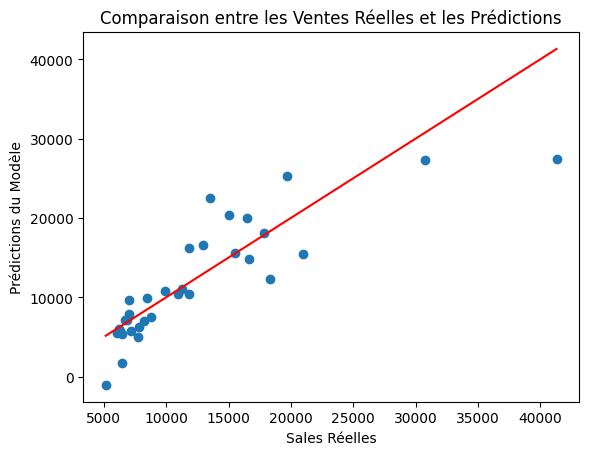

In [20]:
y_pred = model(X_test, theta_final)
print(y_pred.size, y_test.size)
plt.scatter(y_test, y_pred)
plt.xlabel('Sales Réelles')
plt.ylabel('Prédictions du Modèle')
plt.title('Comparaison entre les Ventes Réelles et les Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')  # Line for perfect predictions
plt.show()